# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Komang Agus Wira Adnyana
- **Email:** kmagus104@gmail.com
- **ID Dicoding:** aguswira

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi peminjaman sepeda berdasarkan waktu (per jam) selama periode yang diamati?
- Apa faktor yang mempengaruhi jumlah peminjaman sepeda per hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [2]:
#Memuat day dataset
day_df = pd.read_csv("day.csv")

#Melihat 5 data pertama dari day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Memuat hour dataset
hour_df = pd.read_csv("hour.csv")

#Melihat 5 data pertama dari hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- `day.csv` berisi data terperinci berdasarkan hari, seperti jumlah peminjaman sepeda per hari, durasi penggunaan, suhu, dan lainnya.
- `hour.csv` berisi data yang lebih granular per jam, seperti jumlah peminjaman sepeda per jam, durasi, suhu, cuaca, dan lain-lain.


### Assessing Data

In [4]:
#Menampilkan informasi dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Melihat apakah terdapat data duplikat pada dataset day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
#Menampilkan ringkasan parameter statistik dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
#Menampilkan informasi dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
#Melihat apakah terdapat data duplikat pada dataset hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
#Menampilkan ringkasan parameter statistik dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom `dteday` pada kedua dataset (`day_df` dan `hour_df`) perlu diubah dari tipe data `object` (string) menjadi `datetime` agar analisis berbasis waktu dapat dilakukan dengan lebih efektif.

### Cleaning Data

In [10]:
#Konversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
#Tampilkan info tipe data setelah konversi
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom `dteday` pada kedua dataset (`day_df` dan `hour_df`) awalnya memiliki tipe data yang tidak sesuai untuk analisis berbasis waktu. Kolom ini awalnya memiliki tipe data string, sehingga kita melakukan konversi ke tipe `datetime` untuk memudahkan analisis yang melibatkan perhitungan waktu, seperti perbedaan antara tanggal atau visualisasi berdasarkan waktu.

## Exploratory Data Analysis (EDA)

### Cek Rentang Waktu (Period) untuk `dteday`

In [12]:
#Cek rentang waktu pada day_df
print(day_df['dteday'].min(), day_df['dteday'].max())

#Cek rentang waktu pada hour_df
print(hour_df['dteday'].min(), hour_df['dteday'].max())

2011-01-01 00:00:00 2012-12-31 00:00:00
2011-01-01 00:00:00 2012-12-31 00:00:00


### Outlier pada Data

In [13]:
#1. Memeriksa Outlier pada hour_df
#Menghitung IQR untuk 'cnt' pada hour_df
Q1_hour = hour_df['cnt'].quantile(0.25)
Q3_hour = hour_df['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

#Menghitung batas bawah dan batas atas
lower_bound_hour = Q1_hour - 1.5 * IQR_hour
upper_bound_hour = Q3_hour + 1.5 * IQR_hour

#Menemukan outlier berdasarkan batas IQR
outliers_hour = hour_df[(hour_df['cnt'] < lower_bound_hour) | (hour_df['cnt'] > upper_bound_hour)]

#Menampilkan hasil outlier pada hour_df
print(f"Outliers pada hour_df berdasarkan IQR: {outliers_hour}")

#2. Memeriksa Outlier pada day_df (seperti yang telah dilakukan sebelumnya)
Q1_day = day_df['cnt'].quantile(0.25)
Q3_day = day_df['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day

lower_bound_day = Q1_day - 1.5 * IQR_day
upper_bound_day = Q3_day + 1.5 * IQR_day

#Menemukan outlier berdasarkan batas IQR
outliers_day = day_df[(day_df['cnt'] < lower_bound_day) | (day_df['cnt'] > upper_bound_day)]

#Menampilkan hasil outlier pada day_df
print(f"Outliers pada day_df berdasarkan IQR: {outliers_day}")

Outliers pada hour_df berdasarkan IQR:        instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
5536      5537 2011-08-23       3   0     8  14        0        2           1   
10358    10359 2012-03-12       1   1     3  17        0        1           1   
10359    10360 2012-03-12       1   1     3  18        0        1           1   
10382    10383 2012-03-13       1   1     3  17        0        2           1   
10383    10384 2012-03-13       1   1     3  18        0        2           1   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
16885    16886 2012-12-11       4   1    12   8        0        2           1   
16909    16910 2012-12-12       4   1    12   8        0        3           1   
16933    16934 2012-12-13       4   1    12   8        0        4           1   
17053    17054 2012-12-18       4   1    12   8        0        2           1   
17077    17078 2012-12-19       4   1    12   8        0        3     

### Menangani Outlier dengan Mengganti Nilai Outlier pada `hour_df`

In [14]:
#Mengganti nilai outlier pada 'cnt' di hour_df dengan batas IQR
hour_df['cnt'] = hour_df['cnt'].apply(lambda x: lower_bound_hour if x < lower_bound_hour else (upper_bound_hour if x > upper_bound_hour else x))

#Cek apakah outlier sudah diganti
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


In [15]:
#Mengidentifikasi outlier setelah penggantian
outliers_hour_after = hour_df[(hour_df['cnt'] < lower_bound_hour) | (hour_df['cnt'] > upper_bound_hour)]

#Menampilkan outlier setelah perbaikan
print(f"Outliers setelah perbaikan pada hour_df: {outliers_hour_after}")

Outliers setelah perbaikan pada hour_df: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- Dengan memeriksa nilai minimum dan maksimum dari kolom `dteday`, ditemukan bahwa dataset mencakup periode yang cukup panjang, dengan rentang waktu yang dimulai dari 2011-01-01 hingga 2012-12-31. Rentang waktu ini sangat relevan untuk pertanyaan analisis pertama yang berhubungan dengan distribusi peminjaman sepeda per jam, karena kita bisa melihat tren peminjaman sepeda dalam periode tersebut, dan memastikan data yang digunakan dalam analisis mencakup keseluruhan periode.
- Setelah melakukan analisis lebih lanjut pada kolom `cnt` (jumlah peminjaman sepeda) pada `hour_df`, ditemukan beberapa nilai outlier berdasarkan perhitungan IQR (Interquartile Range). Outlier ini bisa sangat mempengaruhi hasil analisis dan visualisasi, karena mereka bisa mendistorsi pemahaman kita terhadap pola peminjaman sepeda yang sebenarnya. Dalam tahap ini, dilakukan perbaikan outlier dengan mengganti nilai outlier yang lebih rendah dari batas bawah IQR dan lebih tinggi dari batas atas IQR, dengan nilai batas tersebut. Dengan demikian, data yang digunakan lebih representatif dan tidak terpengaruh oleh nilai yang tidak realistis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi peminjaman sepeda berdasarkan waktu (per jam) selama periode yang diamati?

Distribusi Peminjaman Sepeda Berdasarkan Waktu (Per Jam)

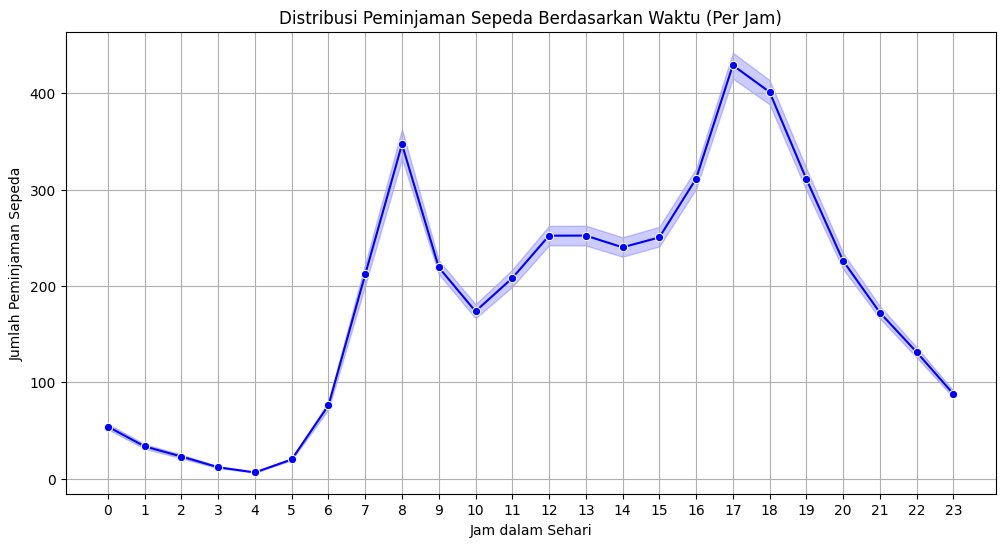

In [16]:
#Visualisasi distribusi peminjaman sepeda per jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', marker='o', color='b')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Waktu (Per Jam)')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Distribusi Peminjaman Sepeda Berdasarkan Waktu (Per Jam) Selama Periode yang Diamati

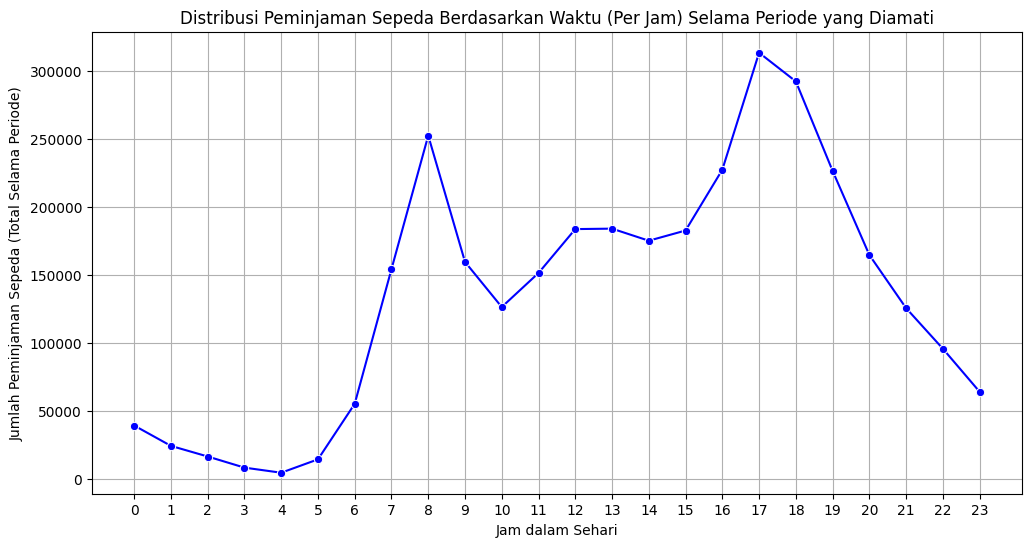

In [17]:
#Menghitung total peminjaman sepeda per jam (selama seluruh periode)
hourly_bike_rentals = hour_df.groupby('hr')['cnt'].sum()

#Visualisasi distribusi peminjaman sepeda per jam (selama periode)
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_bike_rentals.index, y=hourly_bike_rentals.values, marker='o', color='b')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Waktu (Per Jam) Selama Periode yang Diamati')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman Sepeda (Total Selama Periode)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 2: Apa faktor yang mempengaruhi jumlah peminjaman sepeda per hari?

Peminjaman Sepeda Berdasarkan Musim

C:\Users\USER\AppData\Local\Temp\ipykernel_14328\2583794473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_df, palette='Set3')


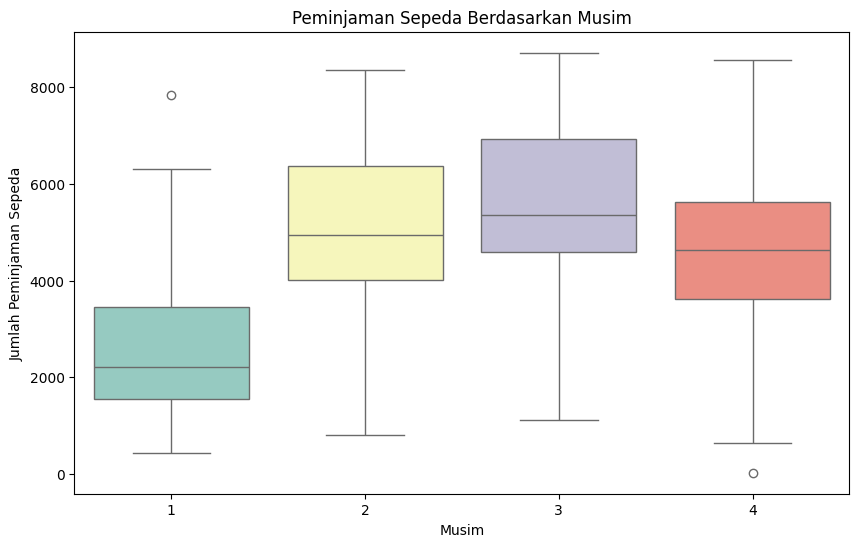

In [18]:
#Visualisasi peminjaman sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df, palette='Set3')
plt.title('Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

Peminjaman Sepeda Berdasarkan Cuaca

C:\Users\USER\AppData\Local\Temp\ipykernel_14328\4029690811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')


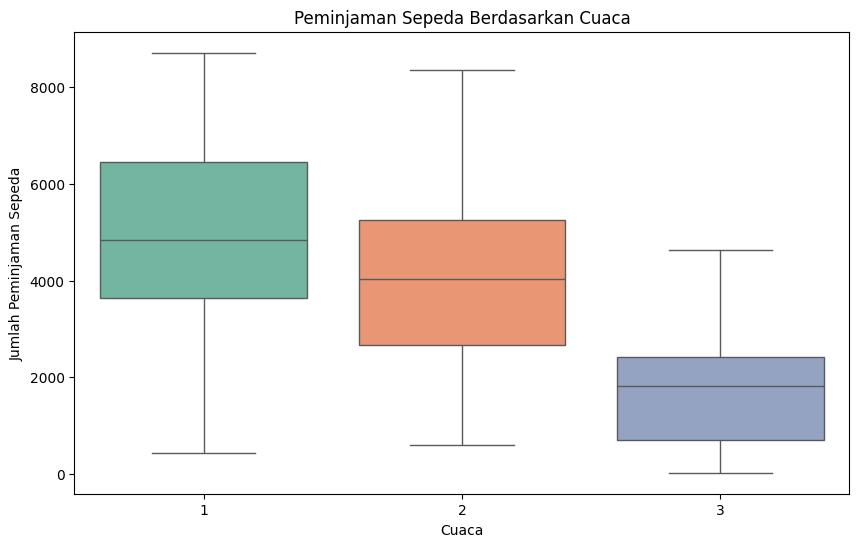

In [19]:
#Visualisasi peminjaman sepeda berdasarkan cuaca (weathersit)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')
plt.title('Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

Peminjaman Sepeda Berdasarkan Suhu

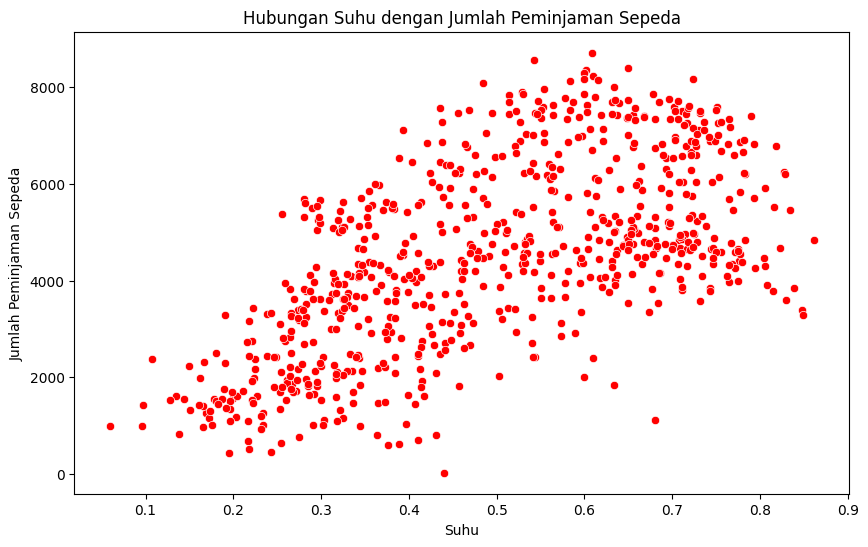

In [20]:
# Visualisasi hubungan suhu dengan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='red')
plt.title('Hubungan Suhu dengan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

Peminjaman Sepeda Berdasarkan Hari Kerja atau Libur

C:\Users\USER\AppData\Local\Temp\ipykernel_14328\2732289816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Set1')


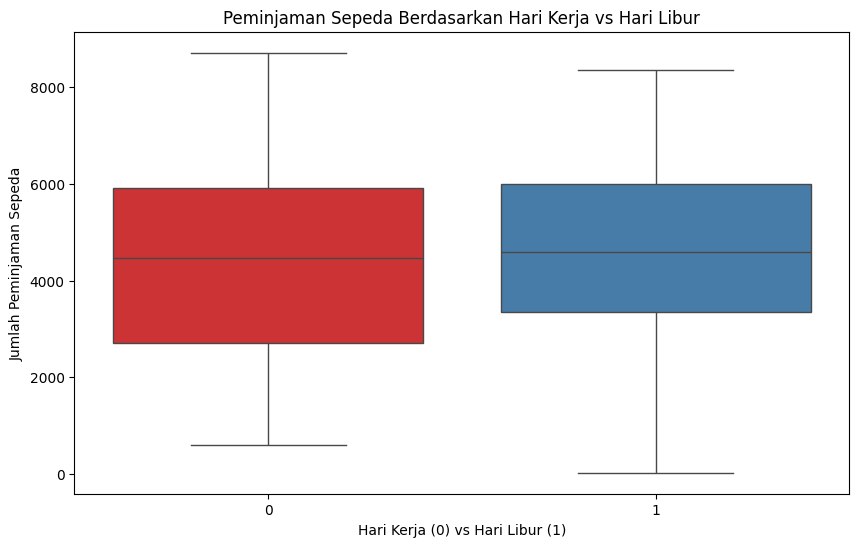

In [21]:
#Visualisasi peminjaman sepeda berdasarkan hari kerja vs hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df, palette='Set1')
plt.title('Peminjaman Sepeda Berdasarkan Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (0) vs Hari Libur (1)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

In [22]:
day_df.to_csv("day_df_data.csv", index=False)
hour_df.to_csv("hour_df_data.csv", index=False)

**Insight:**
- Untuk pertanyaan pertama, kita melihat distribusi peminjaman sepeda berdasarkan waktu per jam untuk mengidentifikasi pola harian.
- Untuk pertanyaan kedua, kita menganalisis beberapa faktor seperti musim, cuaca, suhu, dan hari kerja untuk melihat bagaimana faktor-faktor ini mempengaruhi jumlah peminjaman sepeda per hari.

## Conclusion

- Conclusion pertanyaan 1: 
Dari visualisasi distribusi peminjaman sepeda berdasarkan waktu (per jam), kita dapat melihat pola peminjaman sepeda yang bervariasi sepanjang hari. Puncak peminjaman sepeda biasanya terjadi pada jam-jam tertentu, seperti pagi hari sekitar jam 7-9 dan sore hari sekitar jam 17-19. Hal ini mungkin mencerminkan pola perjalanan sehari-hari, seperti perjalanan menuju tempat kerja pada pagi hari dan pulang kerja pada sore hari. Di luar jam-jam tersebut, peminjaman sepeda cenderung lebih rendah, menunjukkan bahwa sepeda digunakan lebih sering pada jam-jam sibuk. Pola ini bisa sangat berguna bagi penyedia layanan bike sharing untuk menentukan kapan mereka perlu menambah jumlah sepeda yang tersedia di area tertentu berdasarkan waktu.

- Conclusion pertanyaan 2: 
1. Musim: Berdasarkan visualisasi peminjaman sepeda berdasarkan musim, kita dapat melihat perbedaan yang signifikan dalam jumlah peminjaman sepeda antara musim-musim yang berbeda. Musim semi dan musim panas cenderung menunjukkan jumlah peminjaman yang lebih tinggi, sedangkan musim dingin dan musim hujan cenderung menunjukkan jumlah peminjaman yang lebih rendah. Hal ini dapat diartikan bahwa cuaca yang lebih hangat dan cerah meningkatkan minat orang untuk menggunakan sepeda.

2. Cuaca: Visualisasi peminjaman sepeda berdasarkan cuaca menunjukkan bahwa cuaca cerah (weathersit = 1) cenderung meningkatkan jumlah peminjaman sepeda, sementara cuaca buruk seperti hujan (weathersit = 3) dapat mengurangi peminjaman sepeda secara signifikan. Peminjaman sepeda lebih sering terjadi pada hari-hari yang cerah, mencerminkan ketergantungan peminjaman pada kondisi cuaca yang mendukung.

3. Suhu: Ada hubungan positif yang jelas antara suhu dan jumlah peminjaman sepeda. Ketika suhu meningkat, jumlah peminjaman sepeda juga meningkat. Ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda pada suhu yang lebih hangat dibandingkan dengan suhu yang sangat dingin.

4. Hari Kerja vs. Libur: Perbedaan antara hari kerja dan hari libur juga mempengaruhi peminjaman sepeda. Pada hari kerja, jumlah peminjaman sepeda cenderung lebih tinggi, menunjukkan bahwa sepeda digunakan untuk perjalanan menuju tempat kerja atau aktivitas lainnya. Sebaliknya, pada hari libur, jumlah peminjaman cenderung lebih rendah, meskipun ini dapat bervariasi tergantung pada faktor lain seperti cuaca atau musim.


